### Dropbox link for beans20190718.nwb: https://www.dropbox.com/s/srra33e0igaj5rm/beans20190718.nwb?dl=0

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
data_dir = '/Users/loren/data/nwb_builder_test_data'
os.environ['NWB_DATAJOINT_BASE_DIR'] = data_dir
os.environ['KACHERY_STORAGE_DIR'] = os.path.join(data_dir, 'kachery-storage')

In [3]:
import warnings
warnings.simplefilter('ignore')

In [5]:
import nwb_datajoint as nd
import datajoint as dj

Connecting root@localhost:3306


In [8]:
nd.insert_sessions(['beans20190718.nwb'])

Populate Session...
Populate NwbfileKachery...
Populate ExperimenterList...
Populate ElectrodeGroup...
Populate Electrode...
Populate Raw...
Populate SampleCount...
Populate DIOEvants...
Populate SensorData
Populate TaskEpochs
Populate StateScriptFile
Populate VideoFile
RawPosition...
HeadDir...
Unable to import HeadDir: no Behavior module found in beans20190718.nwb
Speed...
Unable to import Speed: no Behavior module found in beans20190718.nwb
LinPos...
Unable to import LinPos: no Behavior module found in beans20190718.nwb


#### Let's look at the core schema (schema = database table). 
First, Nwbfile:

In [17]:
nd.common.Nwbfile()

nwb_file_name the name of the NWB file,nwb_file_abs_path the full path name to the file
beans20190718.nwb,/Users/loren/data/nwb_builder_test_data/beans20190718.nwb


Each NWB file defines a session which also also information about the subject, institution, etc.:

In [14]:
nd.common.Session()

nwb_file_name the name of the NWB file,subject_id,institution_name,lab_name,session_id,session_description,session_start_time,timestamps_reference_time,experiment_description
beans20190718.nwb,Beans,"University of California, San Francisco",Loren Frank,beans_01,Reinforcement leaarning,2019-07-18 15:29:47,1970-01-01 00:00:00,Reinforcement learning


We can use the datajoint Diagram method to represent the relationship between Nwbfile and Session: 
Session is defined by a Nwbfile

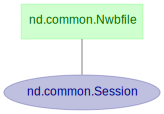

In [18]:
dj.Diagram(nd.common.Nwbfile()) + dj.Diagram(nd.common.Session())

The solid line indicates that the Nwbfile is the primary key for Session, so each Session has exactly one Nwbfile associated with it.

The session also contains references to other schema, including Subject(), Institution, etc. 

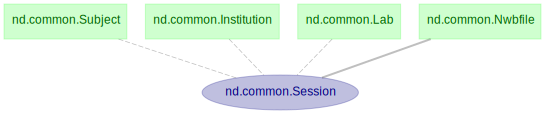

In [19]:
dj.Diagram(nd.common.Nwbfile()) + dj.Diagram(nd.common.Session()) + dj.Diagram(nd.common.Subject()) + dj.Diagram(nd.common.Institution()) + dj.Diagram(nd.common.Lab())

In [16]:
nd.common.Raw()

nwb_file_name the name of the NWB file,interval_list_name descriptive name of this interval list,raw_object_id the NWB object ID for loading this object from the file,"sampling_rate Sampling rate calculated from data, in Hz",comments,description
beans20190718.nwb,raw data valid times,16dddd7b-846a-4a57-a996-26d26ff45101,20000.0,sample comment,Electrical series registered on electrode


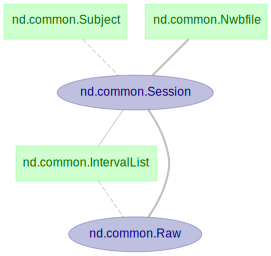

In [11]:
dj.Diagram(nd.common.Subject()) + dj.Diagram(nd.common.Session())+dj.Diagram(nd.common.Nwbfile())+dj.Diagram(nd.common.Raw())

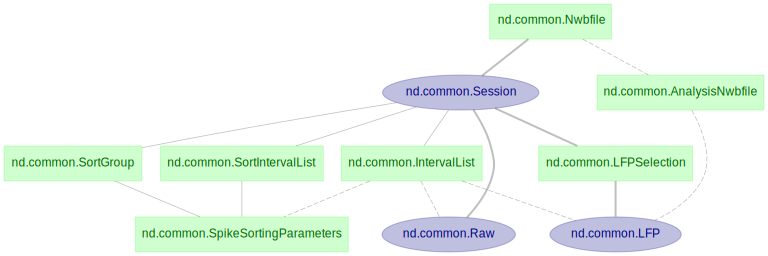

In [10]:
dj.Diagram(nd.common.Session())+dj.Diagram(nd.common.Nwbfile())+dj.Diagram(nd.common.Raw())+dj.Diagram(nd.common.LFP())+dj.Diagram(nd.common.SpikeSortingParameters())

In [5]:
a = (nd.common.IntervalList() & {'interval_list_name' : 'raw data valid times'}).fetch1('valid_times')
print(a)


[[1.56348899e+09 1.56349008e+09]
 [1.56349063e+09 1.56349084e+09]
 [1.56349084e+09 1.56349340e+09]
 [1.56349367e+09 1.56349502e+09]
 [1.56349543e+09 1.56349711e+09]]


/Users/loren/opt/anaconda3/envs/nwbdj/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
nd.common.VideoFile()

/Users/loren/opt/anaconda3/envs/nwbdj/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


nwb_file_name the name of the NWB file,epoch the session epoch for this task and apparatus(1 based),video_file_num,video_file_object_id the object id of the file object


In [16]:
data = (nd.common.Raw() & {'nwb_file_name' : 'beans20190718.nwb'}).fetch_nwb()

In [17]:
data

[{'nwb_file_name': 'beans20190718.nwb',
  'interval_list_name': 'raw data valid times',
  'raw_object_id': '83660030-6339-43ee-8bc8-69e81d4905f4',
  'sampling_rate': 20000.0,
  'comments': 'sample comment',
  'description': 'Electrical series registered on electrode',
  'raw': e-series pynwb.ecephys.ElectricalSeries at 0x140416502675728
  Fields:
    comments: sample comment
    conversion: 1.0
    data: <HDF5 dataset "data": shape (138007758, 256), type "<i2">
    description: Electrical series registered on electrode
    electrodes: electrodes <class 'hdmf.common.table.DynamicTableRegion'>
    interval: 1
    resolution: -1.0
    timestamps: <HDF5 dataset "timestamps": shape (138007758,), type "<f8">
    timestamps_unit: seconds
    unit: volts}]

In [5]:
nd.common.SpikeSorting().drop()

[autoreload of nwb_datajoint.common.common_ephys failed: Traceback (most recent call last):
  File "/Users/loren/opt/anaconda3/envs/nwb_datajoint/lib/python3.7/site-packages/datajoint/declare.py", line 142, in compile_foreign_key
    ref = eval(result.ref_table, context)
  File "<string>", line 1
    units_object_id: varchar(40) # the object ID for the units for this sort group
                   ^
SyntaxError: invalid syntax

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/loren/opt/anaconda3/envs/nwb_datajoint/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/loren/opt/anaconda3/envs/nwb_datajoint/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/loren/opt/anaconda3/envs/nwb_datajoint/lib/python3.7/imp.py", line 314, in reload
    return import

`common_ephys`.`__spike_sorting` (0 tuples)


Proceed? [yes, No]:  yes


Tables dropped.  Restart kernel.


In [8]:
nd.common.Session().delete()
nd.common.Nwbfile().drop()

About to delete:
`common_ephys`.`l_f_p_selection__l_f_p_electrode`: 16 items
`common_ephys`.`sort_group__sort_group_electrode`: 256 items
`common_ephys`.`_electrode`: 256 items
`common_ephys`.`_electrode_group`: 2 items
`common_ephys`.`l_f_p_selection`: 1 items
`common_ephys`.`__spike_sorting`: 1 items
`common_ephys`.`spike_sorting_parameters`: 1 items
`common_ephys`.`sort_group`: 8 items
`common_behav`.`_raw_position`: 1 items
`common_dio`.`_d_i_o_events`: 19 items
`common_ephys`.`_raw`: 1 items
`common_sensors`.`_sensor_data`: 1 items
`common_task`.`_task_epoch`: 4 items
`common_interval`.`interval_list`: 9 items
`common_interval`.`sort_interval_list`: 1 items
`common_session`.`_experimenter_list__experimenter`: 1 items
`common_session`.`_experimenter_list`: 1 items
`common_session`.`_session`: 1 items


Proceed? [yes, No]:  yes


Committed.
`common_lab`.`nwbfile` (1 tuples)
`common_session`.`_session` (0 tuples)
`common_session`.`_experimenter_list` (0 tuples)
`common_session`.`_experimenter_list__experimenter` (0 tuples)
`common_interval`.`sort_interval_list` (0 tuples)
`common_interval`.`interval_list` (0 tuples)
`common_task`.`_task_epoch` (0 tuples)
`common_sensors`.`_sensor_data` (0 tuples)
`common_ephys`.`_raw` (0 tuples)
`common_dio`.`_d_i_o_events` (0 tuples)
`common_behav`.`_speed` (0 tuples)
`common_behav`.`_raw_position` (0 tuples)
`common_behav`.`_lin_pos` (0 tuples)
`common_behav`.`_head_dir` (0 tuples)
`common_ephys`.`sort_group` (0 tuples)
`common_ephys`.`spike_sorting_parameters` (0 tuples)
`common_ephys`.`l_f_p_selection` (0 tuples)
`common_ephys`.`_electrode_group` (0 tuples)
`common_ephys`.`_electrode` (0 tuples)
`common_ephys`.`sort_group__sort_group_electrode` (0 tuples)
`common_ephys`.`l_f_p_selection__l_f_p_electrode` (0 tuples)
`common_lab`.`analysis_nwbfile` (1 tuples)
`common_ephys`.`_

Proceed? [yes, No]:  no


In [5]:
nd.common.Nwbfile().delete()

/Users/loren/opt/anaconda3/envs/nwbdj/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


About to delete:
`common_lab`.`__nwbfile_kachery`: 1 items
`common_ephys`.`sort_group__sort_group_electrode`: 192 items
`common_ephys`.`_electrode`: 192 items
`common_ephys`.`_electrode_group`: 2 items
`common_ephys`.`spike_sorting_parameters`: 2 items
`common_ephys`.`sort_group`: 8 items
`common_behav`.`_raw_position`: 1 items
`common_dio`.`_d_i_o_events`: 19 items
`common_ephys`.`_raw`: 1 items
`common_sensors`.`_sensor_data`: 1 items
`common_task`.`_task_epoch`: 4 items
`common_interval`.`interval_list`: 9 items
`common_interval`.`sort_interval_list`: 1 items
`common_session`.`_experimenter_list__experimenter`: 1 items
`common_session`.`_experimenter_list`: 1 items
`common_session`.`_session`: 1 items
`common_lab`.`nwbfile`: 1 items


Proceed? [yes, No]:  yes


Committed.


In [5]:
(nd.common.Raw() & {'nwb_file_name' : 'beans20190718.nwb'}).fetch1('interval_list_name')

'raw data valid times'

In [6]:
nd.common.SpikeSorting().drop()

/Users/loren/opt/anaconda3/envs/nwb_datajoint/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


`common_spikesorting`.`__spike_sorting` (1 tuples)


Proceed? [yes, No]:  yes


Tables dropped.  Restart kernel.


In [6]:
s1 = (nd.common.IntervalList() & {'interval_list_name': '01_s1'}).fetch1()
s2 = (nd.common.IntervalList() & {'interval_list_name': '03_s2'}).fetch1()
r1 = (nd.common.IntervalList() & {'interval_list_name': '02_r1'}).fetch1()

r2 = (nd.common.IntervalList() & {'interval_list_name': '04_r2'}).fetch1()

In [8]:
nd.common.IntervalList()
s1 = (nd.common.IntervalList() & {'interval_list_name' : '01_s1'}).fetch1('valid_times')

In [9]:
s1

array([[1.56348899e+09, 1.56349008e+09]])

In [24]:
t[0][1] = t[0][0] + 100

In [22]:
t = s1.copy()

In [27]:
nd.common.IntervalList.insert1({'nwb_file_name' : 'beans20190718.nwb', 'interval_list_name' : 'test', 'valid_times' : t})

In [17]:
nd.common.IntervalList()

nwb_file_name the name of the NWB file,interval_list_name descriptive name of this interval list,valid_times 2D numpy array with start and end times for each interval
beans20190718.nwb,01_s1,=BLOB=
beans20190718.nwb,02_r1,=BLOB=
beans20190718.nwb,03_s2,=BLOB=
beans20190718.nwb,04_r2,=BLOB=
beans20190718.nwb,pos 0 valid times,=BLOB=
beans20190718.nwb,pos 1 valid times,=BLOB=
beans20190718.nwb,pos 2 valid times,=BLOB=
beans20190718.nwb,pos 3 valid times,=BLOB=
beans20190718.nwb,raw data valid times,=BLOB=
beans20190718.nwb,test,=BLOB=


In [12]:
a = (nd.common.IntervalList() & {'interval_list_name' : '01_s1'}).fetch1()

In [13]:
a

{'nwb_file_name': 'beans20190718.nwb',
 'interval_list_name': '01_s1',
 'valid_times': array([[1.56348899e+09, 1.56349008e+09]])}

In [14]:
b = a.copy()

In [15]:
b['interval_list_name'] = 'test'

In [18]:
(nd.common.IntervalList & {'interval_list_name' : 'test'}).delete()

About to delete:
`common_interval`.`interval_list`: 1 items


Proceed? [yes, No]:  yes


Committed.
